# **NEXUS INFO INTERNSHIP**

📚TASK-01 : STOCK MARKET PREDICTION

👨‍💼NAME : G.Y.N.V.NILESH

📅BATCH : SUMMER INTERNSHIP-2

📊DOMAIN : DATA SCIENCE

🎯AIM : TO BUILD A PRECISE MODEL TO FORECAST FUTURE STOCK PRICES.

💡ALGORITHM USED:LINEAR REGRESSION

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# data = pd.read_csv('infolimpioavanzadoTarget.csv')
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING CSV FILE**

In [38]:

# Path to your file in Google Drive
file_path = '/content/drive/My Drive/infolimpioavanzadoTarget.csv'

# Load the dataset into a Pandas DataFrame
data = pd.read_csv(file_path)


In [39]:
print(len(data))

7781


**EXPLORATORY DATA ANALYSIS(EDA)**

In [40]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [41]:
data.tail()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0
7780,2022-12-30,23.680000,23.760000,23.610001,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.760000,45.784072,41.002059,45.784072,41.002059,4.782013,0.482993,NaN,NaN,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [43]:
data.describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


**CHECK MISSING VALUES**

In [44]:
print(data.isnull().sum())

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [45]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


RSIadjclose15        465
RSIvolume15          465
RSIadjclose25        775
RSIvolume25          775
RSIadjclose50       1550
                    ... 
stochastic-d-15      587
stochastic-kd-15     587
volumenrelativo      215
diff                 155
INCREMENTO           155
Length: 1265, dtype: int64


In [46]:
# List of columns to fill with mean
mean_fill_columns = ['RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25', 'RSIadjclose50', 'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET']


for column in mean_fill_columns:
    data[column].fillna(data[column].mean(), inplace=True)



In [47]:
# Verify the filling
print(data.isnull().sum())

date                0
open                0
high                0
low                 0
close               0
                   ..
stochastic-kd-15    0
volumenrelativo     0
diff                0
INCREMENTO          0
TARGET              0
Length: 1285, dtype: int64


In [48]:
data.head(10)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,1.188956,-0.120000,-0.758054,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,1.006903,-0.460000,-2.818628,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,0.740293,-1.300001,-7.394773,0
7,2022-01-12,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,1.181191,-1.110001,-6.479863,0
8,2022-01-13,16.000000,16.170000,15.680000,15.810000,15.810000,69100,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,0.596204,-1.400001,-8.134808,0
9,2022-01-14,15.700000,15.750000,15.360000,15.590000,15.590000,92900,ASLE,46.817434,49.81479,...,NaN,NaN,NaN,NaN,NaN,0.298413,0.801553,-1.180000,-7.036376,0


In [49]:
# Identify remaining columns with NaN values
remaining_missing_values = data.isnull().sum()
remaining_columns_with_nan = remaining_missing_values[remaining_missing_values > 0].index.tolist()
print("Remaining columns with NaN values:\n", remaining_columns_with_nan)

Remaining columns with NaN values:
 ['RSIvolume50', 'MACDadjclose15', 'MACDvolume15', 'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50', 'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1', 'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15', 'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2', 'MACDdif-volume-15-3', 'MACDsig-adjclose-25', 'MACDdif-adjclose-25-0', 'MACDdif-adjclose-25-1', 'MACDdif-adjclose-25-2', 'MACDdif-adjclose-25-3', 'MACDsig-volume-25', 'MACDdif-volume-25-0', 'MACDdif-volume-25-1', 'MACDdif-volume-25-2', 'MACDdif-volume-25-3', 'MACDsig-adjclose-50', 'MACDdif-adjclose-50-0', 'MACDdif-adjclose-50-1', 'MACDdif-adjclose-50-2', 'MACDdif-adjclose-50-3', 'MACDsig-volume-50', 'MACDdif-volume-50-0', 'MACDdif-volume-50-1', 'MACDdif-volume-50-2', 'MACDdif-volume-50-3', 'MACDhistadjclose15', 'MACDhistvolume15', 'MACDhistadjclose25', 'MACDhistvolume25', 'MACDhistadjclose50', 'MACDhistvolume50', 'laglow1', '

In [50]:
# Fill remaining missing values with forward fill
data.fillna(method='ffill', inplace=True)

<ipython-input-50-d8da9d7c11db>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [51]:
# applying backward fill
data.fillna(method='bfill', inplace=True)

<ipython-input-51-1886801e4fb0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [52]:

missing_values_after = data.isnull().sum()
print("Remaining missing values:\n", missing_values_after[missing_values_after > 0])

Remaining missing values:
 Series([], dtype: int64)


In [53]:
data.head(10)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,1.188956,-0.120000,-0.758054,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,1.006903,-0.460000,-2.818628,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,0.740293,-1.300001,-7.394773,0
7,2022-01-12,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,1.181191,-1.110001,-6.479863,0
8,2022-01-13,16.000000,16.170000,15.680000,15.810000,15.810000,69100,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,0.596204,-1.400001,-8.134808,0
9,2022-01-14,15.700000,15.750000,15.360000,15.590000,15.590000,92900,ASLE,46.817434,49.81479,...,18.309999,13.812156,11.161508,13.812156,11.161508,0.298413,0.801553,-1.180000,-7.036376,0


**STOCK PRICE TRENDS OVER TIME**

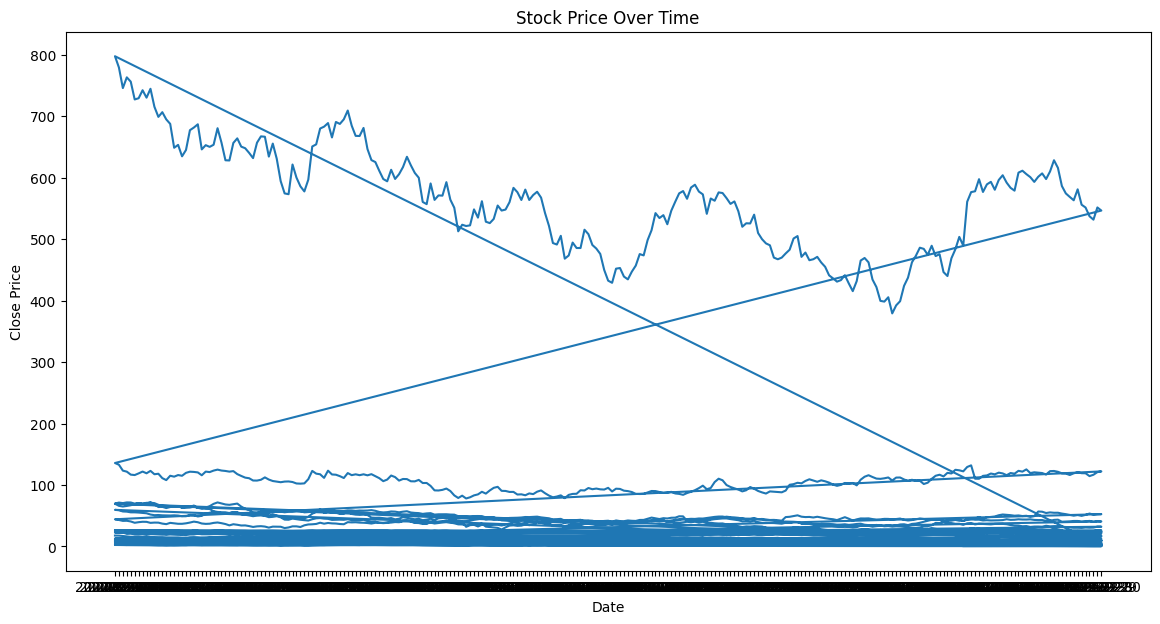

In [54]:
plt.figure(figsize=(14, 7))
plt.plot(data['date'], data['close'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


**DISTRIBUTION OF STOCK PRICES**

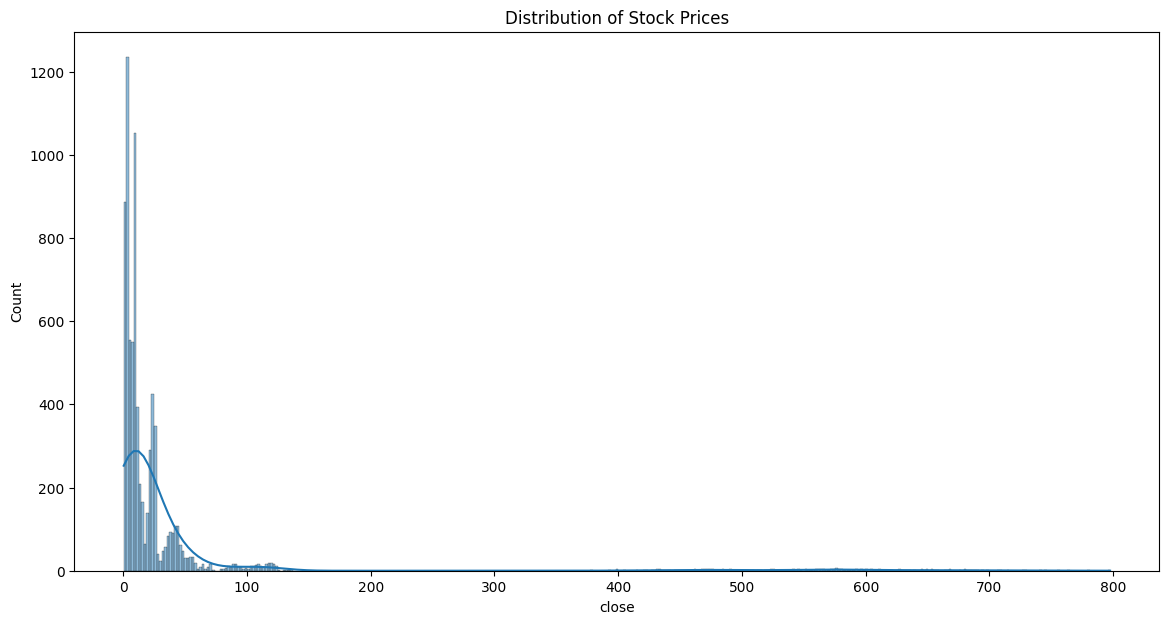

In [55]:
plt.figure(figsize=(14, 7))
sns.histplot(data['close'], kde=True)
plt.title('Distribution of Stock Prices')
plt.show()


In [56]:
!pip install pandas_ta


In [57]:
import pandas_ta as ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [58]:
# Calculating technical indicators using 'adjclose'
data['SMA_50'] = ta.sma(data['adjclose'], length=50)
data['SMA_200'] = ta.sma(data['adjclose'], length=200)
data['RSI'] = ta.rsi(data['adjclose'], length=14)
data['MACD'] = ta.macd(data['adjclose'])['MACD_12_26_9']
data['MACD_signal'] = ta.macd(data['adjclose'])['MACDs_12_26_9']
bollinger = ta.bbands(data['adjclose'], length=20, std=2)
data['BB_upper'] = bollinger['BBU_20_2.0']
data['BB_middle'] = bollinger['BBM_20_2.0']
data['BB_lower'] = bollinger['BBL_20_2.0']


In [59]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,INCREMENTO,TARGET,SMA_50,SMA_200,RSI,MACD,MACD_signal,BB_upper,BB_middle,BB_lower
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,46.817434,49.81479,...,-9.664295,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,46.817434,49.81479,...,-7.247895,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.81479,...,-5.201344,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.81479,...,-2.177856,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.81479,...,-0.758054,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Handle missing values for calculated indicators
technical_indicators = ['SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']
for column in technical_indicators:
    data[column].fillna(data[column].mean(), inplace=True)

In [61]:
data.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,INCREMENTO,TARGET,SMA_50,SMA_200,RSI,MACD,MACD_signal,BB_upper,BB_middle,BB_lower
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,46.817434,49.81479,...,-9.664295,0,34.582177,34.899211,47.285026,0.0059,0.006048,41.130271,34.5202,27.91013
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,46.817434,49.81479,...,-7.247895,0,34.582177,34.899211,47.285026,0.0059,0.006048,41.130271,34.5202,27.91013
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,46.817434,49.81479,...,-5.201344,0,34.582177,34.899211,47.285026,0.0059,0.006048,41.130271,34.5202,27.91013
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,46.817434,49.81479,...,-2.177856,0,34.582177,34.899211,47.285026,0.0059,0.006048,41.130271,34.5202,27.91013
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,46.817434,49.81479,...,-0.758054,0,34.582177,34.899211,47.285026,0.0059,0.006048,41.130271,34.5202,27.91013


In [62]:
# Set 'adjclose' as the target column
close_column = 'adjclose'

In [63]:
# Prepare the data for modeling
features = data[['open', 'high', 'low', 'volume', 'SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal', 'BB_upper', 'BB_middle', 'BB_lower']]
target = data[close_column]  # Ensure this uses the correct column name

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**TRAIN THE MODEL**

In [64]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict
y_pred = model.predict(X_test)

In [66]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.369276428398461


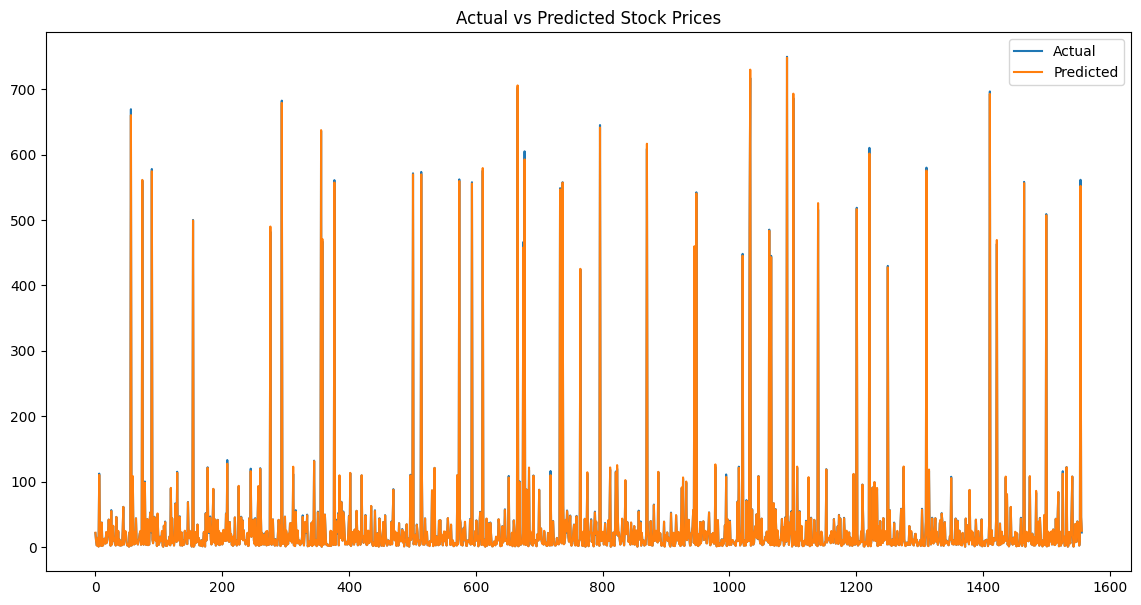

In [67]:
# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# **Thank You**